                        1
0                        
2021-03-31 05:50:00   3.0
2021-03-31 06:00:00  16.0
2021-03-31 06:10:00  23.0
2021-03-31 06:20:00  37.0
2021-03-31 06:30:00  59.0


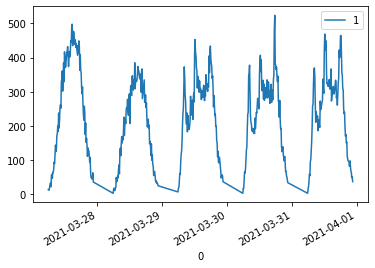

0
2021-03-31 05:50:00     3.0
2021-03-31 06:00:00    16.0
2021-03-31 06:10:00    23.0
2021-03-31 06:20:00    37.0
2021-03-31 06:30:00    59.0
                       ... 
2021-03-27 21:50:00    48.0
2021-03-27 22:00:00    45.0
2021-03-27 22:10:00    50.0
2021-03-27 22:20:00    63.0
2021-03-27 22:30:00    36.0
Name: 1, Length: 505, dtype: float64
505


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#File_name = input("please enter file name to open: ")
#future_days = int(future_days)
#print(dir(keras.losses))

#Data import.

#data = pd.read_csv(File_name,index_col=0, parse_dates=True)
data = pd.read_csv("long.csv", index_col=0, parse_dates=True, header=None)
data = data.astype('float')
print(data.head())
data.plot()
plt.show()
print(data[1])
print(len(data))
#data.drop('out', axis='columns', inplace=True)
#data.plot()
#data2.plot()

In [112]:
#Scale data to a range of -1,1 and split to training and testing set.
scaler = StandardScaler()
scaler = scaler.fit(data)
dataset = scaler.transform(data)
train_data = int(len(dataset) * 0.9)
test_data = (int(len(dataset) - train_data ))
train, test = dataset[0:train_data], dataset[train_data:len(dataset)]



In [113]:
# Reshape data to lenght, timesteps and number of features.
n_future = 1 
n_past = 14 
def create_dataset(my_data, n_future, n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(my_data) - n_future +1):
        dataX.append(my_data[i - n_past:i, 0:my_data.shape[1]])
        dataY.append(my_data[i + n_future - 1:i + n_future, 0])
    return np.array(dataX), np.array(dataY)
trainX, trainY = create_dataset(train, n_future, n_past)
testX, testY = create_dataset(test, n_future, n_past)
print(trainX.shape)
print(trainY.shape)

(440, 14, 1)
(440, 1)


In [114]:
#RNN model  starts.
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
history = model.fit(trainX, trainY, epochs=30,validation_split=0.1, batch_size=32)
model.summary()

Epoch 1/30
13/13 [==============================] - 2s 41ms/step - loss: 0.7544 - val_loss: 0.7402
Epoch 2/30
13/13 [==============================] - 0s 16ms/step - loss: 0.4977 - val_loss: 0.2015
Epoch 3/30
13/13 [==============================] - 0s 17ms/step - loss: 0.3446 - val_loss: 0.2094
Epoch 4/30
13/13 [==============================] - 0s 17ms/step - loss: 0.2930 - val_loss: 0.0909
Epoch 5/30
13/13 [==============================] - 0s 17ms/step - loss: 0.2221 - val_loss: 0.1580
Epoch 6/30
13/13 [==============================] - 0s 17ms/step - loss: 0.1982 - val_loss: 0.1341
Epoch 7/30
13/13 [==============================] - 0s 17ms/step - loss: 0.1598 - val_loss: 0.1357
Epoch 8/30
13/13 [==============================] - 0s 17ms/step - loss: 0.1474 - val_loss: 0.1083
Epoch 9/30
13/13 [==============================] - 0s 17ms/step - loss: 0.1434 - val_loss: 0.1619
Epoch 10/30
13/13 [==============================] - 0s 18ms/step - loss: 0.1340 - val_loss: 0.1241
Epoch 11/

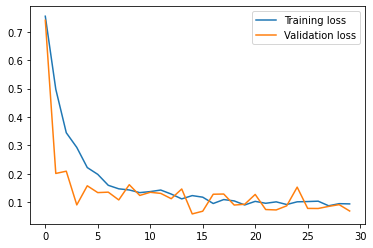

In [115]:
# Plot model loss comparison.
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

#plot.scatter(xTrain, yTrain, color = 'red')
#plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
#plot.title('Salary vs Experience (Training set)')
#plot.xlabel('Years of Experience')plot.ylabel('Salary')
#plot.show()

In [116]:
# Create future date list.
future_prediction_real = 10
datelist_future = pd.date_range(datelist_train[-1], periods=future_prediction_real, freq="d").tolist()

In [117]:
# Predict future days.
prediction = model.predict(trainX[-future_prediction_real:])
print(prediction.shape)
prediction_copies = np.repeat(prediction, data.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

(10, 1)


In [118]:
# Create date list table and future pediction table and combine side by side.
datelist_future_ = []
for i in datelist_future:
    datelist_future_.append(i.date())

In [119]:
data_forecust = pd.DataFrame({'FutureDates':np.array(datelist_future), 'Prediction':y_pred_future})
data_forecust['FutureDates']=pd.to_datetime(data_forecust['FutureDates'])

In [120]:
print(data_forecust)

          FutureDates  Prediction
0 2021-03-27 22:30:00  359.854401
1 2021-03-28 22:30:00  365.944458
2 2021-03-29 22:30:00  375.318939
3 2021-03-30 22:30:00  380.751465
4 2021-03-31 22:30:00  387.014709
5 2021-04-01 22:30:00  372.936462
6 2021-04-02 22:30:00  350.307159
7 2021-04-03 22:30:00  349.829315
8 2021-04-04 22:30:00  359.111389
9 2021-04-05 22:30:00  356.077240


In [121]:
original['Date']=pd.to_datetime(original.index)
#original = original.loc[original['Date'] >= '2020-5-1']

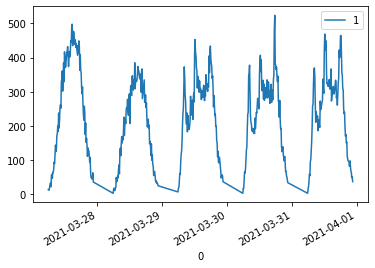

In [122]:
data.plot()
plt.show()

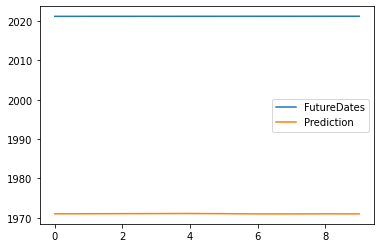

In [123]:
data_forecust.plot()
plt.show()